In [18]:
import mnist_loader
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,core
from keras.layers.normalization import BatchNormalization
from keras import optimizers, applications
from keras.models import Model
from keras import backend as K

In [19]:
def regenModel(i = 250):
    model = Sequential()
    model.add(Dense(400, activation = 'relu', input_shape = (i,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(400, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [20]:
training_data, validation_data, testing_data = mnist_loader.load_data_wrapper()
x_train, y_train = zip(*training_data)
x_train = np.array(list(x_train))
y_train = np.array(list(y_train))

x_val, y_val = zip(*validation_data)
x_val = np.array(list(x_val))
y_val = np.array(list(y_val))


x_test, y_test = zip(*testing_data)
x_test = np.array(list(x_test))
y_test = np.array(list(y_test))

x_train = np.concatenate( (x_train, x_val), axis = 0)
y_train = np.concatenate( (y_train, y_val), axis = 0)

x_train.shape = (x_train.shape[0],x_train.shape[1])
x_test.shape = (x_test.shape[0],x_test.shape[1])

y_train.shape = (y_train.shape[0],y_train.shape[1])
y_test.shape = (y_test.shape[0],y_test.shape[1])
print(x_train.shape, x_test.shape)

x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

(60000, 784) (10000, 784)


In [21]:
print(y_train.shape)

(60000, 10)


In [22]:
#Apply PCA
x_mean = np.mean(x_train,axis=0)
X_train= x_train - x_mean
X_test = x_test - x_mean
cov = np.dot(X_train.T, X_train)/ X_train.shape[0] # get the data covariance matrix
U,S,V = np.linalg.svd(cov) #Columns of U = eigenvectors, S = eigenvalues


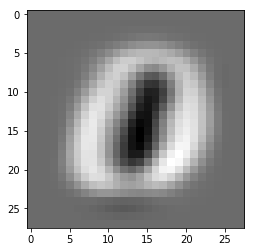

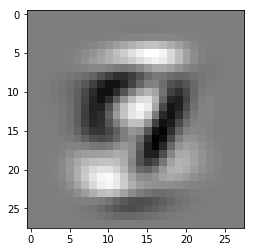

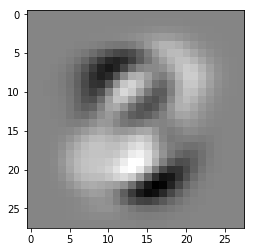

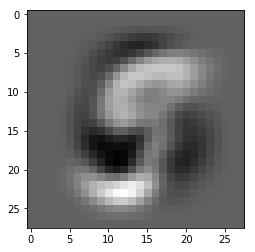

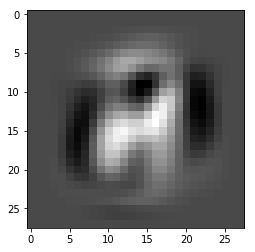

In [26]:
#Visualize EigenVectors
for i in range(0,5):
    plt.imshow(U[:,i].reshape(28,28),cmap='gray')
    plt.show()


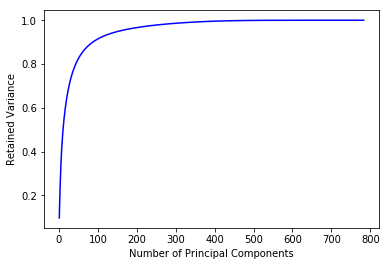

In [27]:
retained_var = []
for i in range(1,784):
    retained_var.append((np.sum(S[:i]) / np.sum(S)))

#print(retained_var)

plt.plot(range(1,784), retained_var, 'b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Retained Variance')
plt.show()

In [24]:
#Build a classifier
num_PC = [1,5,10,25, 50,100,250,500,784]
acc = []
#Project Images onto PC
for e in num_PC:
    print('Number of Principal Components: ', e)
    X_tr = np.dot(X_train, U[:,:e])
    X_te = np.dot(X_test, U[:,:e])
    model = regenModel(e)
    model.fit(X_tr, y_train,
                  batch_size=128,
                  epochs=15,
                  validation_data=(X_te, y_test), verbose = 0)
    
    eva = model.evaluate(X_te, y_test, batch_size=128,verbose = 0)
    eva = np.asarray(eva)
    acc.append(eva[1])
    
    #print('Accuracy: ',eva[1])


Number of Principal Components:  1
Accuracy:  0.3191
Number of Principal Components:  5
Accuracy:  0.765
Number of Principal Components:  10
Accuracy:  0.9458
Number of Principal Components:  25
Accuracy:  0.9824
Number of Principal Components:  50
Accuracy:  0.985
Number of Principal Components:  100
Accuracy:  0.9839
Number of Principal Components:  250
Accuracy:  0.9821
Number of Principal Components:  500
Accuracy:  0.9793
Number of Principal Components:  784
Accuracy:  0.9787


[1, 5, 10, 25, 50, 100, 250, 500, 784]
[0.3191, 0.765, 0.9458, 0.9824, 0.985, 0.9839, 0.9821, 0.9793, 0.9787]


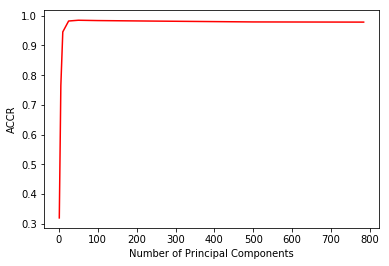

In [25]:
print(num_PC)
print(acc)
plt.plot(num_PC,acc,'r')
plt.xlabel('Number of Principal Components')
plt.ylabel('ACCR')
plt.show()

In [30]:
print('Best Average CCR: ', max(acc))

Best Average CCR:  0.985
